# Comparison of source Count Matrices  
## (Sagar vs Mine)

Sagar appears to have generated fantastic clustering of the E725 data, compared to the more divergent clustering I had generated.

This can be due to a multitude of different reasons:

 1. Demultiplexing and cell selection  
   Demultiplexing is performed by using a list of known barcodes to extract cell data from FASTQ reads and effectively seperate each cell into it's own collection.
      * No barcode file was given for the 2018_03 data, so I used the barcode file from the previous analysis (2017_12) and assumed that the platform was the same (CelSeq2).
      * One option to explore is discovering the barcodes without a reference, using the UMI-tools whitelist option. (Testing this now).
 2. Alignment/Mapping  
    The GTF file given to the aligner denotes the genes/transcripts targeted, and the number (and position) of these change between genome builds. For mice, mm9 and mm10 are both widely accepted, and so some source of variability between mine and Sagar's sets could be attributed to this.

Let us load our two data sets (mine, Sagar's) and examine any immediate differences:

In [10]:
xmine <- read.csv("source/E725.matrix.Seb_NewData_E725.3.quantif", sep = "\t", header = TRUE, row.name = 1)

head(xmine)
message("Mine: ", dim(xmine)[1], " genes and ", dim(xmine)[2], " cells.")

,GGTAGA,ATCGTG,ATGGAC,AGTAGG,CCATCA,AGTACC,CCAGTA,CGTTAC,GAGGTA,TTGGCA,⋯,CGTCTA,CCATAG,TTCCAG,GGACAA,ACTTCG,TTGTGC,GGTATG,CTGCTA,ATGAGG,ACGTTG
ENSMUSG00000000001,8,7,3,3,1,1,0,16,4,9,⋯,2,1,4,3,4,4,0,2,10,2
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,0,0,1,1,0,8,3,1,2,1,⋯,2,0,2,2,5,1,1,0,3,2
ENSMUSG00000000031,61,94,47,66,5,37,38,60,101,78,⋯,50,45,74,51,77,84,40,48,110,26
ENSMUSG00000000037,0,0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
ENSMUSG00000000049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


49671 genes and 192 cells.


In [20]:
xsagar <- readRDS("source/prdata.sagar")         

head(xsagar)
message("Sagar: ", dim(xsagar)[1], " genes and ", dim(xsagar)[2], " cells.")

,SAE725FACS1_1_1,SAE725FACS1_1_2,SAE725FACS1_1_3,SAE725FACS1_1_4,SAE725FACS1_1_5,SAE725FACS1_1_6,SAE725FACS1_1_7,SAE725FACS1_1_8,SAE725FACS1_1_9,SAE725FACS1_1_10,⋯,SAE725FACS8_8_129,SAE725FACS8_8_145,SAE725FACS8_8_148,SAE725FACS8_8_154,SAE725FACS8_8_161,SAE725FACS8_8_164,SAE725FACS8_8_169,SAE725FACS8_8_173,SAE725FACS8_8_177,SAE725FACS8_8_180
0610007P14Rik,0.000000,0.000000,1.000122,4.001954,0.000000,1.000122,0,0,0,1.000122,⋯,2.000488,2.000488,0.000000,0,3.001099,0,0.000000,1.000122,0,1.000122
0610009B22Rik,0.000000,3.001099,4.001954,3.001099,1.000122,4.001954,0,0,0,1.000122,⋯,4.001954,1.000122,2.000488,0,2.000488,0,1.000122,0.000000,0,1.000122
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009L18Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,0,0.000000
0610009O20Rik,0.000000,1.000122,0.000000,0.000000,0.000000,1.000122,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,2.000488,0,0.000000,0.000000,0,1.000122
0610010F05Rik,1.000122,0.000000,0.000000,1.000122,0.000000,0.000000,0,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,1.000122,0,2.000488


Sagar: 33901 genes and 430 cells.


Immediately we can see:
 * Mine has more genes - 49671
 * Sagar has more cells - 430
 * Mine uses *Ensembl* IDs, and Sagar uses *MGI*
 

## Differences in Genes
 
In order to truly compare we must convert Sagar's MGI gene data to Ensemble and then perform an overlap. 

### BioMart

To do the naming conversion, we must use BioMart. 
When it works it is a fantastic library, unfortunately it is an extremely unreliable when pulling data from the internet and so I have to write the following convoluted methods below to pull data at increments at a time and patch them together:

In [13]:
# Let us measure the overlap between his detected genes and my detected genes
require(biomaRt)
# listMarts()
mart <- useMart(biomart = "ENSEMBL_MART_ENSEMBL", dataset = "mmusculus_gene_ensembl")

Loading required package: biomaRt


In [16]:
# This here is just to find which MGI attributes we will need
#listAttributes(mart)[65:68,]
#head(rownames(xsagar))

In [45]:
# Weird bug with BioMart which can't handle more than 5000 queries
# at a time.

# This is a waste of my time and they should patch this soon!!
incremental_getBM <- function(names, filter_type, attribs){
    
    if (is.null(attribs)){
        attribs <- c(
            "ensembl_gene_id",              # Gene stable ID
            "external_gene_name",           # Casual name
            "mgi_symbol"                   # Mouse Genome Index name
#            "external_transcript_name",     # Transcript-specific name
#            "gene_biotype",                 # Gene biotype
#            "transcript_biotype",           # Trans type
#            "description",                  # Gene description
#            "band",                         # Karyotype band
#            "refseq_mrna",
#            "go_id",                        # Go Term accession (cellular domains)
#            "go_linkage_type",              # Go Term evidence code
#            "name_1006"                    # Go Term name
#            "definition_1006",              # Go Term definition
#            "namespace_1003"                # Go domain                  
        )
    }
    
   
    return(getBM(filters = filter_type, attributes = attribs, values = names, mart = mart))
}

populate_BMarray <- function(fullnames, bin_size, filter_type, attribs){
    
    success_bm <- list()
    failed_bm <- list()

    index_sta = 1
    index_end = index_sta + bin_size - 1

    # Initial pass over full set
    while (index_end < length(fullnames) + bin_size){
        key_name <- paste(index_sta, "-", index_end)
       
        bm_vals <- NULL
        
        tryCatch({
            message("Trying ", key_name)
            bm_vals <- incremental_getBM(
                fullnames[index_sta:index_end],
                filter_type, attribs
            )
        }, error = function(e){
            message("Failed to retrieve values for ", key_name)
            bm_vals <- NULL
        });
        
        #print(length(bm_vals))
        
        if (!is.null(bm_vals)){
            success_bm[[key_name]] <- bm_vals
        }
        else {
            failed_bm[[key_name]] <- c(index_sta,index_end)
            
        }

        index_sta = index_sta + bin_size
        index_end = index_end + bin_size
    }

    # Second pass, repeat until there are no more entries in failed_bm
    message("trying failed bms again")
    while (length(failed_bm) > 0)
    {
        fst_key <- names(failed_bm)[1]
        index_sta <- failed_bm[fst_key][1]
        index_end <- failed_bm[fst_key][2]
        
        bm_vals <- NULL
        
        tryCatch({
            message("Trying ", fst_key)
            bm_vals <- incremental_getBM(
                fullnames[index_sta:index_end],
                filter_type, attribs
            )
        }, error = function(e){
            bm_vals <- NULL
        });
        

        if (!is.null(bm_vals)){
            success_bm[[key_name]] <- bm_vals
            failed_bm[[key_name]] <- NULL
        }
        else {
            message("Failed to retrieve values for ", key_name)
        }
    }
    
    message("Generating full K")
    # Bind together all tables to make a k
    k <- c()
    for (tabl in success_bm){
        k <- rbind(k, tabl)
    }    
    
    return(k)
}





In [19]:
ksagar <- populate_BMarray(
    rownames(xsagar), 2000, 
    "mgi_symbol")

Trying 1 - 2000
Trying 2001 - 4000
Trying 4001 - 6000
Trying 6001 - 8000
Trying 8001 - 10000
Trying 10001 - 12000
Trying 12001 - 14000
Trying 14001 - 16000
Trying 16001 - 18000
Trying 18001 - 20000
Trying 20001 - 22000
Trying 22001 - 24000
Trying 24001 - 26000
Trying 26001 - 28000
Trying 28001 - 30000
Trying 30001 - 32000
Trying 32001 - 34000
trying failed bms again
Generating full K


In [20]:
kmine <- populate_BMarray(
    rownames(xmine), 2000, 
    "ensembl_gene_id")

Trying 1 - 2000
Trying 2001 - 4000
Trying 4001 - 6000
Trying 6001 - 8000
Trying 8001 - 10000
Trying 10001 - 12000
Trying 12001 - 14000
Trying 14001 - 16000
Trying 16001 - 18000
Trying 18001 - 20000
Trying 20001 - 22000
Trying 22001 - 24000
Trying 24001 - 26000
Trying 26001 - 28000
Trying 28001 - 30000
Trying 30001 - 32000
Trying 32001 - 34000
Trying 34001 - 36000
Trying 36001 - 38000
Trying 38001 - 40000
Trying 40001 - 42000
Trying 42001 - 44000
Trying 44001 - 46000
Trying 46001 - 48000
Trying 48001 - 50000
trying failed bms again
Generating full K


Let's see exactly how much of the gene names produce by the aligners are valid against the `ENSEMBL_MART_ENSEMBL` database in the `mmusculus_gene_ensembl` dataset.

In [29]:
message("Mine: ", dim(xmine)[1], " → ", dim(kmine)[1], " valid genes discovered.")

Mine: 49671 → 49516 valid genes discovered.


In [30]:
message("Sagar: ", dim(xsagar)[1], " → ", dim(ksagar)[1], " valid genes discovered.")

Sagar: 33901 → 31650 valid genes discovered.


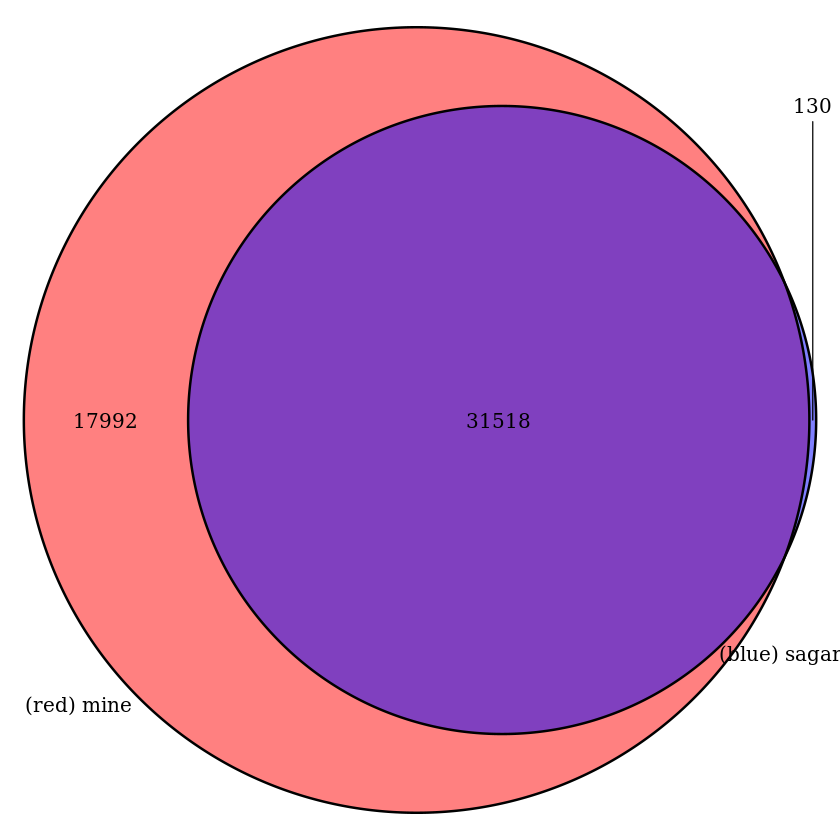

In [32]:
library(VennDiagram)

ensembl_sagar <- ksagar$ensembl_gene_id
ensembl_mine <- kmine$ensembl_gene_id

venn.plot <- venn.diagram(
    x = list(
        "(blue) sagar" = ensembl_sagar,
        "(red) mine" = ensembl_mine
    ),
    fill = c("blue","red"),
    filename = NULL
);
grid.draw(venn.plot);

We seem to have an almost complete overlap between sets, where my genes almost fully encompass Sagar's with a small discrepancy of 130 genes that do not appear in my data.

Let's examine some of these genes:

In [40]:
union_sets <- union(ensembl_mine, ensembl_sagar)
onethirty <- union_sets[!union_sets %in% ensembl_mine]

sagar_onethirty <- ksagar[ksagar$ensembl_gene_id %in% onethirty,c(1,2)]
head(sagar_onethirty, 14)

,ensembl_gene_id,external_gene_name
11,ENSMUSG00000108680,0610030E20Rik
984,ENSMUSG00000112356,4930432B10Rik
1079,ENSMUSG00000112493,4930486F22Rik
1984,ENSMUSG00000110868,AA467197
2293,ENSMUSG00000113640,Adat3
2491,ENSMUSG00000097319,Aip
2575,ENSMUSG00000114515,Aldoa
3068,ENSMUSG00000110906,Arrdc2
3087,ENSMUSG00000098615,Arvcf
3188,ENSMUSG00000106907,Atg2a


### How many of the 130 non-overlapping genes have non-zero expression?

In [41]:
sagar_rowsums <- rowSums(xsagar[rownames(xsagar) %in% sagar_onethirty$external_gene_name,])
length(sagar_rowsums[sagar_rowsums > 0])

[1] 102

So these genes cannot be easily ignored, since most have non-zero expression.

### How many of the transcripts have been retired?

In [49]:
#reasons_for_130 <- populate_BMarray(
#    sagar_onethirty$external_gene_name,
#    2000, "mgi_symbol", c("mgi_symbol", "description")
#)

## 
getexpr = function(s,g){substring(s,g,g+attr(g,'match.length')-1)}
matcher <- '<div class="lhs">Status</div><div class="rhs"><p>([^<]*)</p>'

checkStatus <- function(rname){
    
    url_name <- paste(
        'http://www.ensembl.org/Mus_musculus/Gene/Idhistory?g=', rname,
        sep=""
    )
    page <- readLines(url_name)
    
    datalines <- grep(matcher, page, value=T)
    gg = gregexpr(matcher,datalines)
    matches = mapply(getexpr,datalines,gg)
    result = gsub(matcher,'\\1',matches)
    names(result) = NULL

    return(result)
}

alleg <- list()
for (mgi in sagar_onethirty$external_gene_name){
    alleg <- rbind(alleg, c(mgi, checkStatus(mgi)))
}
colnames(alleg) <- c("MGI", "Status")

ERROR: Error in data.table(alleg): could not find function "data.table"


In [62]:
head(alleg)
dim(alleg)
length(grep("Current", alleg))

MGI,Status
0610030E20Rik,Current
4930432B10Rik,Current
4930486F22Rik,Current
AA467197,Current
Adat3,Current
Aip,Current


[1] 130   2

[1] 130

The grep command shows that all transcripts are current. But we actually know this is not the case:

 * ENSMUSG00000112493 does not exist in the GTF file for mm10 or mm9 on Galaxy.
 * ENSMUSG00000112493 is also known as (MGI) 4930486F22Rik
   * 4930486F22Rik does not exist in mm10 GTF, but does exist in mm9 GTF where it is given the identifier ENSMUSG00000085435, so we know that Sagar was using mm9.
   * A search for ENSMUSG00000085435 produces a retired gene with no relevant successors (which is why it is not in mm10).
   
 The same appears to be the case of Aip, which has a new identifier ENSMUSG00000024847 instead of the ENSMUSG00000097319 it is given.
    

### Conclusion

The differences in gene numbers stem from the more recent mm10 GTF file used in my analysis which can demarkate more genes, and as seen by the Venn diagram above encapsulates more than 95% of Sagar's genes derived from the mm9 assembly. The 130 non-overlap in genes is due to this mm9 → mm10 transition where certain genes are depreciated/renamed.


## Differences in Cells

Let us now explore why the number of detected cells is so drastically different.

### Mine

My count matrix was derived using a barcode file from the initial 2017_12 data where I assumed that the barcodes would be the same if they came from the same platform.

However, I realise now that the initial 2017_12 data was mouth-pippetted and the new 2018_03 data is FACS sorted/selected, and though they both likely used the same primer from the CelSeq2 protocol, there could be some differences in barcodes.

 * To explore this point further, I used the `umi_tools whitelist` command to try and estimate the barcodes based on the *NNNNNNCCCCCC* (6bp umi + 6bp barcode) format.
  * This yielded a barcode file of 195 cells
  * (I also tried this the other way (6C6N) and found 1096 cells which was clearly false.)

A quick intersection of the estimated barcodes and the barcodes I had obtained previously yields:

In [17]:
barcodes_estimated <- read.table('source/barcodes.whitelisted.6N6C')
barcodes_obtained <- read.table('source/barcodes.provided')

raw_estimated <- barcodes_estimated[,1]
raw_obtained <- barcodes_obtained[,2]

message(" Estimated barcodes:", length(raw_estimated))
message("  Obtained barcodes:", length(raw_obtained))

message("Estimate ^ Obtained:", length(unique(union(raw_estimated, raw_obtained))))

 Estimated barcodes:195
  Obtained barcodes:192
Estimate ^ Obtained:197


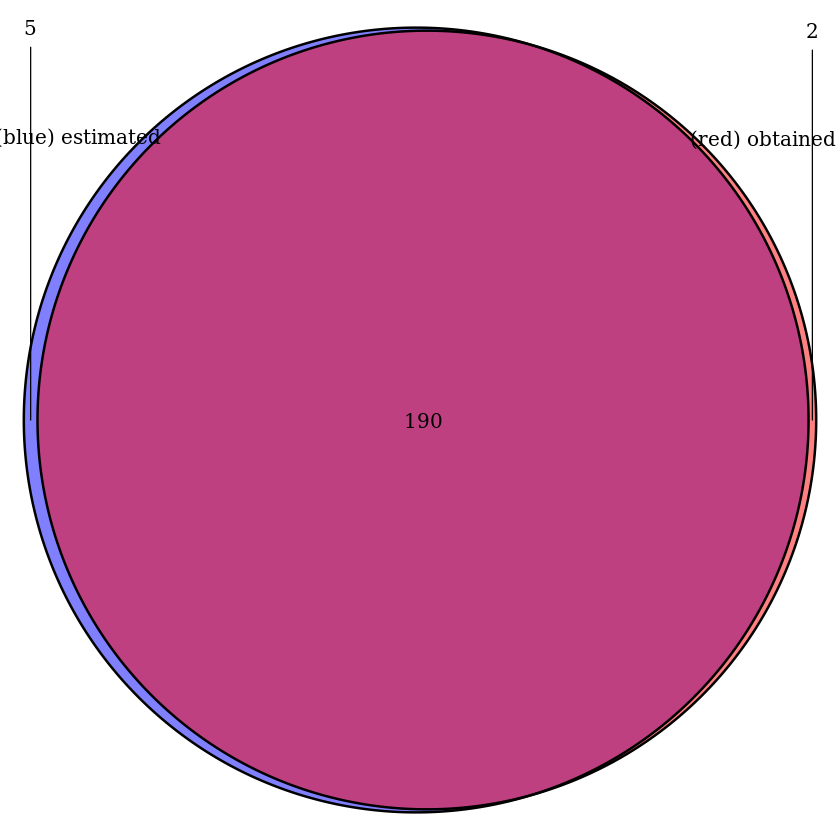

In [18]:
library(VennDiagram)

venn.plot <- venn.diagram(
    x = list(
        "(blue) estimated" = raw_estimated,
        "(red) obtained" = raw_obtained
    ),
    fill = c("blue","red"),
    filename = NULL
);
grid.draw(venn.plot);

So from this we can see that 190 cell barcodes match between estimated and obtained, and that the obtained barcodes has 2 cells that the estimated could not detect (likely due to zero counts).

We can also see that the estimated barcodes have 5 cells that were not in the barcodes provided previously.

This is troubling for two reasons:
 * The Estimated barcodes come from FACS sorted data. FACS uses 8x12 = 96-well plates, meaning we should expect no more than 192 cells for two plates, and that no barcodes were repeated.
 * The union of both sets provide us with 197 unique barcodes, which once again exceed the FACS mapping capacity.
 
Something odd is happening, and to investigate we should pay attention to the cell headers used in the Sagar data

### Sagar

Let us simply print out all the names used in his matrix and see what we can deduce.

In [37]:
# Matrix for neatness
snames <- colnames(xsagar)
matrix(snames, ncol=20)
message("Number of cells: ", length(snames))
message("- matching !'SAE725': ", sum(!grepl("SAE725", snames)))
message("- matching  'SAE725': ", sum(grepl("SAE725", snames)))
message("  - of which 'FACS1': ", sum(grepl("SAE725FACS1", snames)))
message("  - of which 'FACS2': ", sum(grepl("SAE725FACS2", snames)))
message("  - of which 'FACS3': ", sum(grepl("SAE725FACS3", snames)))
message("  - of which 'FACS4': ", sum(grepl("SAE725FACS4", snames)))
message("  - of which 'FACS5': ", sum(grepl("SAE725FACS5", snames)))
message("  - of which 'FACS6': ", sum(grepl("SAE725FACS6", snames)))
message("  - of which 'FACS7': ", sum(grepl("SAE725FACS7", snames)))
message("  - of which 'FACS8': ", sum(grepl("SAE725FACS8", snames)))


Warning message in matrix(snames, ncol = 20):
“data length [430] is not a sub-multiple or multiple of the number of rows [22]”

SAE725FACS1_1_1,SAE725FACS1_1_25,SAE725FACS1_1_55,SAE725FACS1_1_82,SAE725FACS2_2_109,SAE725FACS2_2_139,SAE725FACS2_2_164,SAE725FACS2_2_191,SAE725FACS3_3_33,SAE725FACS3_3_63,SAE725FACS3_3_90,SAE725FACS4_4_117,SAE725FACS4_4_146,SAE725FACS4_4_180,SAE725FACS6_6_129,SAE725FACS6_6_185,SAE725FACS7_7_35,SAE725FACS7_7_82,SAE725FACS7_7_142,SAE725FACS8_8_121
SAE725FACS1_1_2,SAE725FACS1_1_26,SAE725FACS1_1_56,SAE725FACS1_1_83,SAE725FACS2_2_110,SAE725FACS2_2_140,SAE725FACS2_2_166,SAE725FACS3_3_1,SAE725FACS3_3_34,SAE725FACS3_3_66,SAE725FACS3_3_91,SAE725FACS4_4_118,SAE725FACS4_4_151,SAE725FACS4_4_181,SAE725FACS6_6_130,SAE725FACS6_6_186,SAE725FACS7_7_41,SAE725FACS7_7_83,SAE725FACS7_7_145,SAE725FACS8_8_125
SAE725FACS1_1_3,SAE725FACS1_1_27,SAE725FACS1_1_57,SAE725FACS1_1_84,SAE725FACS2_2_114,SAE725FACS2_2_142,SAE725FACS2_2_167,SAE725FACS3_3_2,SAE725FACS3_3_35,SAE725FACS3_3_67,SAE725FACS3_3_92,SAE725FACS4_4_119,SAE725FACS4_4_152,SAE725FACS4_4_182,SAE725FACS6_6_131,SAE725FACS6_6_192,SAE725FACS7_7_42,SAE725FACS7_7_84,SAE725FACS7_7_146,SAE725FACS8_8_129
SAE725FACS1_1_4,SAE725FACS1_1_28,SAE725FACS1_1_58,SAE725FACS1_1_85,SAE725FACS2_2_116,SAE725FACS2_2_143,SAE725FACS2_2_168,SAE725FACS3_3_3,SAE725FACS3_3_36,SAE725FACS3_3_68,SAE725FACS3_3_93,SAE725FACS4_4_120,SAE725FACS4_4_154,SAE725FACS4_4_183,SAE725FACS6_6_137,SAE725FACS7_7_1,SAE725FACS7_7_43,SAE725FACS7_7_89,SAE725FACS7_7_148,SAE725FACS8_8_145
SAE725FACS1_1_5,SAE725FACS1_1_30,SAE725FACS1_1_59,SAE725FACS1_1_86,SAE725FACS2_2_118,SAE725FACS2_2_144,SAE725FACS2_2_169,SAE725FACS3_3_6,SAE725FACS3_3_37,SAE725FACS3_3_70,SAE725FACS3_3_94,SAE725FACS4_4_121,SAE725FACS4_4_155,SAE725FACS4_4_185,SAE725FACS6_6_138,SAE725FACS7_7_2,SAE725FACS7_7_44,SAE725FACS7_7_90,SAE725FACS7_7_153,SAE725FACS8_8_148
SAE725FACS1_1_6,SAE725FACS1_1_31,SAE725FACS1_1_60,SAE725FACS1_1_87,SAE725FACS2_2_119,SAE725FACS2_2_145,SAE725FACS2_2_170,SAE725FACS3_3_7,SAE725FACS3_3_38,SAE725FACS3_3_71,SAE725FACS3_3_95,SAE725FACS4_4_122,SAE725FACS4_4_157,SAE725FACS4_4_186,SAE725FACS6_6_141,SAE725FACS7_7_4,SAE725FACS7_7_49,SAE725FACS7_7_91,SAE725FACS7_7_161,SAE725FACS8_8_154
SAE725FACS1_1_7,SAE725FACS1_1_33,SAE725FACS1_1_61,SAE725FACS1_1_88,SAE725FACS2_2_121,SAE725FACS2_2_146,SAE725FACS2_2_172,SAE725FACS3_3_8,SAE725FACS3_3_40,SAE725FACS3_3_72,SAE725FACS4_4_97,SAE725FACS4_4_123,SAE725FACS4_4_158,SAE725FACS4_4_187,SAE725FACS6_6_142,SAE725FACS7_7_9,SAE725FACS7_7_50,SAE725FACS7_7_92,SAE725FACS7_7_162,SAE725FACS8_8_161
SAE725FACS1_1_8,SAE725FACS1_1_34,SAE725FACS1_1_62,SAE725FACS1_1_89,SAE725FACS2_2_122,SAE725FACS2_2_148,SAE725FACS2_2_173,SAE725FACS3_3_9,SAE725FACS3_3_41,SAE725FACS3_3_73,SAE725FACS4_4_98,SAE725FACS4_4_124,SAE725FACS4_4_159,SAE725FACS4_4_188,SAE725FACS6_6_145,SAE725FACS7_7_10,SAE725FACS7_7_51,SAE725FACS7_7_93,SAE725FACS7_7_166,SAE725FACS8_8_164
SAE725FACS1_1_9,SAE725FACS1_1_35,SAE725FACS1_1_66,SAE725FACS1_1_90,SAE725FACS2_2_124,SAE725FACS2_2_150,SAE725FACS2_2_174,SAE725FACS3_3_10,SAE725FACS3_3_43,SAE725FACS3_3_74,SAE725FACS4_4_99,SAE725FACS4_4_127,SAE725FACS4_4_161,SAE725FACS4_4_189,SAE725FACS6_6_146,SAE725FACS7_7_12,SAE725FACS7_7_52,SAE725FACS7_7_94,SAE725FACS7_7_169,SAE725FACS8_8_169
SAE725FACS1_1_10,SAE725FACS1_1_36,SAE725FACS1_1_67,SAE725FACS1_1_92,SAE725FACS2_2_125,SAE725FACS2_2_151,SAE725FACS2_2_177,SAE725FACS3_3_11,SAE725FACS3_3_44,SAE725FACS3_3_75,SAE725FACS4_4_101,SAE725FACS4_4_130,SAE725FACS4_4_162,SAE725FACS4_4_190,SAE725FACS6_6_147,SAE725FACS7_7_13,SAE725FACS7_7_57,SAE725FACS7_7_97,SAE725FACS7_7_170,SAE725FACS8_8_173
SAE725FACS1_1_11,SAE725FACS1_1_38,SAE725FACS1_1_68,SAE725FACS1_1_93,SAE725FACS2_2_126,SAE725FACS2_2_152,SAE725FACS2_2_178,SAE725FACS3_3_12,SAE725FACS3_3_45,SAE725FACS3_3_76,SAE725FACS4_4_102,SAE725FACS4_4_131,SAE725FACS4_4_163,SAE725FACS4_4_191,SAE725FACS6_6_148,SAE725FACS7_7_16,SAE725FACS7_7_59,SAE725FACS7_7_113,SAE725FACS7_7_171,SAE725FACS8_8_177


Number of cells: 430
- matching !'SAE725': 0
- matching  'SAE725': 430
  - of which 'FACS1': 80
  - of which 'FACS2': 75
  - of which 'FACS3': 71
  - of which 'FACS4': 71
  - of which 'FACS5': 0
  - of which 'FACS6': 36
  - of which 'FACS7': 79
  - of which 'FACS8': 18


From this we can see that there are 430 cells, all from the E725 source, and that they were spread over 8 different batches with not one batch exceeding 96 wells. Batch 5 failed to detect any transcripts at all in any of its cells, and Batch 6+8 detected poorly too.

The maximum potential was 8 * 96 = 768 cells, and we instead have 430. Given the low-seq depth coverage and the tiny amount of RNA needed to be amplified (<10pg), this type of loss is normal.

#### How do these correlate to the source FASTQ?

The source FASTQ data we were given have the following filenames for the R1:

```
./Sample_17L003268/SA_E725_FACS_1_R1.fastq.gz
./Sample_17L003269/SA_E725_FACS_2_R1.fastq.gz
./Sample_17L003270/SA_E725_FACS_3_R1.fastq.gz
./Sample_17L003271/SA_E725_FACS_4_R1.fastq.gz
./Sample_17L003272/SA_E725_FACS_5_R1.fastq.gz
./Sample_17L003273/SA_E725_FACS_6_R1.fastq.gz
./Sample_17L003274/SA_E725_FACS_7_R1.fastq.gz
./Sample_17L003275/SA_E725_FACS_8_R1.fastq.gz

```

It seems as though my assumption that barcodes are unique across multiple was wrong. Here was my reasoning:

 * CelSeq2 Barcodes are 6bp long and each barcode differs in 2bp from each other in order to account for sequencing errors. This means that for 4^6 = there are 4096 unique barcodes, 1024 that differ by 2bp from one another for use in CelSeq2.
 * 1024 unique barcodes means 1024 unique cells so you can easily use different barcodes over 10 FACS batches and not have to worry about conflicts.
 
I now realise that this is not true. In reality, each FACS 96-well plate uses its own set of barcodes and cell names are **NOT** unique to the barcode, but are unique **ONLY** to the position in the plate and the plate number.

# Actions to Take

 1. Fix the demultiplex workflow
   1. Do not concatenate FASTQ files from different FACS plates. Let me just say that again:   
   DO **NOT** CONCATENATE FASTQ FILES FROM **DIFFERENT** FACS PLATES.  
   2. Perform demultiplexing on *batch input* where each input is data from a single FACS plate.
 2. Fix the quantification workflow
  * Do not replace headers with those used by the barcodes, replace headers with FACS-specific names.
 3. Create a final merge workflow
   * This will perform union over all the different count matrices performed in the different quantification stages, and there should be NO name clashes whatsoever.    
   * There should also be some kind of quality metric to show how many cells were detected in each plate.
 4. Recreate the Sagar count matrix for E725.
   * Replicate clustering results in RaceID